## The Potential Field of an Electric Charge

In this exercise I model the potential field of an electric charge for a range of physical configurations.

We start by considering the example of the Poisson equation $(\nabla^2V = −\rho)$ in one dimension. The grid of nodes in this case can be taken as a series of $n$ equally spaced points $x_i$ with a spacing $\Delta x = h$. The Taylor expansion of $V$ around the point $x_i$ is :

$$ V(x) = V(x_i) + \delta x \frac{dV(x_i)}{dx} + \delta x^2 \frac{d^2V(x_i)}{dx^2} + ...$$

so adding the values at $\delta x = \pm h$ (i.e. at $x_n \pm 1$) gives :

$$ V(x_{i−1}) + V(x_{i+1}) = 2V(x_i) + h^2 \frac{d^2V(x_i)}{dx^2} $$

which can be rearranged to give Equation 1 :

$$ \frac{d^2V(x_i)}{dx^2} = \frac{V(x-{i−1}) + V(x_{i+1}) − 2V(x_i)}{h^2}  $$

This is the standard finite difference representation for the second derivative.

Generalising this equation to 2D in the Poisson equation, and rearranging, gives Equation 2, that can be used to iterate the value at each node:

$$ V(x_i,y_j)= \frac{1}{4} (V(x_{i−1},y_j)+V(x_{i+1},y_j)+V(x_i,y_{j−1})+V(x_i,y_{j+1}))+ \frac{\rho(x_i,y_j)h^2}{4} $$

In the absence of any sources ($\nabla^2 V=0$, i.e. the Laplace equation) each node is simply the average of its four closest neighbours.

One option for solving this equation is to calculate a new value for each node based on the previous values for each of the neighbour nodes, requiring two complete copies of the grid. This is called the Jacobi method.

## a) 
Below I have written a function to solve Laplace’s equation in two dimensions for the potential V.

In [8]:
import numpy as np

def Jacobi(x,y,S):  #Defines the difference equations within a function
    S[x][y] = (S[x-1][y] + S[x+1][y] + S[x][y-1] + S[x][y+1])*(1/4)
    return(S[x][y])

M =np.zeros(shape=(n,n)) #Initialises the grid values
n=10
cond = 1000
while (cond>0.01):
    Mc_0 = M[n-2][n-2]  #Records the value at a location prior to an iteration
    for x in np.arange(1,n-1,1):
        for y in np.arange(1,n-1,1):
            M[x][y] = Jacobi(x,y,M) #Populates the matrix with updated values by calling the Jacobi function
            Mc_1 = M[n-2][n-2]  #Records the value at a location after an iteration
            cond = (Mc_1 - Mc_0) #Defines the convergance        

The above code performs Jacobi iteration by firstly setting up a function which models the difference equations generated by taking the Taylor expansion of the Poisson equation. In this function the values at x and y, within an arbitary matrix 'S', are defined as the average of the value of it's four nearest neighbours.

The code then sets up an arbitrary matix 'M' and populates it with the output values generated by a 'while' loop. The loop calls the Jacobi function at every location within the matrix using a set of nested 'for' loops over x and y. Once 'M' has been completely updated a convergance condition is tested and, once met, the loop terminates and reiteration ceases.

The code tests for convergance by selecting an element within the matrix and recording its value before and after a single iteration. Once the difference between these two values falls below a certain value the convergance condition is deemed as being met.

Below I verify the function by checking it works in a simple, known case.

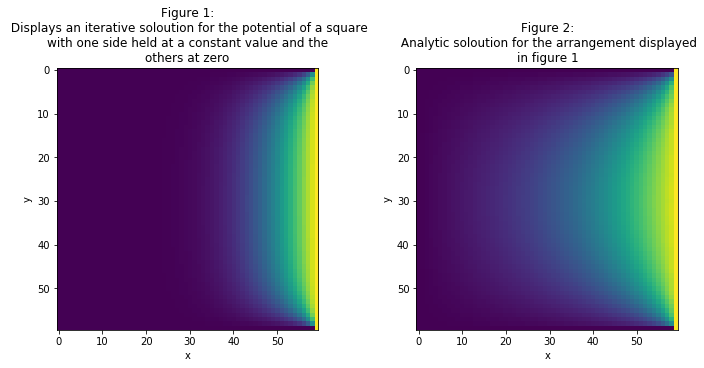

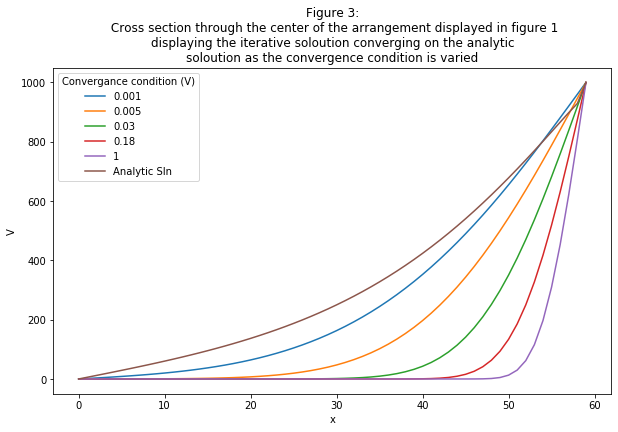

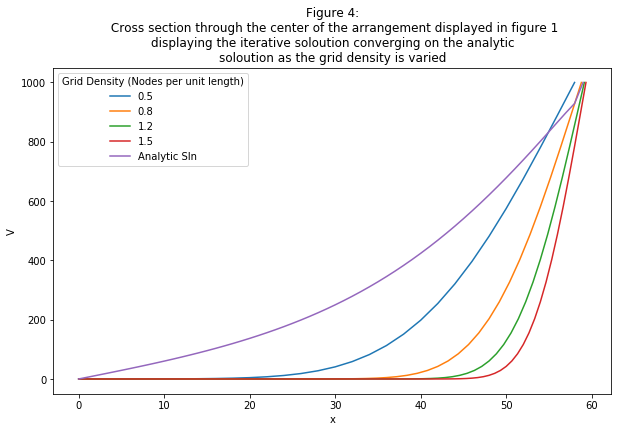

In [9]:
import matplotlib.pyplot as plt

l = 60  #Sets the length of the square
v=1000  #Sets the value of the potential
n=60   #Sets the order of the grid

M =np.zeros(shape=(n,n)) #Initialises the grid values
M[0,:]=0    #Sets the locations of the potential and boundary conditions
M[-1,:]=0
M[:,0]=0
M[:,-1]=v
   
cond = 1000
while (cond>0.01):  #Defines the convergance condition
    Mc_0 = M[n-2][n-2]  #Records the value at a location prior to an iteration
    for x in np.arange(1,n-1,1):
        for y in np.arange(1,n-1,1):
            M[x][y] = Jacobi(x,y,M) #Populates the matrix with updated values by calling the Jacobi function
            Mc_1 = M[n-2][n-2]  #Records the value at a location after an iteration
            cond = (Mc_1 - Mc_0)
            
plt.figure(figsize=(10,10))
plt.subplot(1, 2, 1)
plt.imshow(M)
plt.title('Figure 1:\n Displays an iterative soloution for the potential of a square\n\
with one side held at a constant value and the\n\
others at zero')
plt.ylabel('y')
plt.xlabel('x')

A =np.zeros(shape=(n,n))
A[0,:]=0
A[-1,:]=0
A[:,0]=0
A[:,-1]=v

def Analytic(X,Y):  #Defines the analytic soloution for the one sided square potential
    Analytic = 0
    for i in range(1,20,2): #Sums over the fourier series soloution for i odd
        Analytic = Analytic + ((4*v)/(i*np.pi))*((1)/(np.sinh(i*np.pi)))*\
        (np.sin((i*np.pi*X)/(n)))*(np.sinh((i*np.pi*Y)/(n)))
    return(Analytic)
        
for X in np.arange(0,n-1,1):
    for Y in np.arange(0,n-1,1):
        A[X][Y] = Analytic(X,Y)     #Fills the matrix A with values provided by the analytic soloution

plt.subplot(1, 2, 2)
plt.imshow(A)
plt.title('Figure 2:\n Analytic soloution for the arrangement displayed\n\
in figure 1')
plt.ylabel('y')
plt.xlabel('x')
plt.tight_layout()
plt.show()


plt.figure(figsize=(10,6))    #Reproduces the conditions in firgure 1, but varies the convergance condition.
for lim in np.logspace(2,5,num=5,base=10,dtype='int'):  #Loops over a set of limit values
    
    N =np.zeros(shape=(n,n)) 
    N[0,:]=0    
    N[-1,:]=0
    N[:,0]=0
    N[:,-1]=v
    
    p = 1e-5    #Scaling factor for the limit values
    cond = 1000     
    while (cond>p*lim):
        Nc_0 = N[n-2][n-2]
        for x in np.arange(1,n-1,1):    
            for y in np.arange(1,n-1,1):
                N[x][y] = Jacobi(x,y,N) 
                Nc_1 = N[n-2][n-2]
                cond = (Nc_1 - Nc_0)
    plt.plot(N[30,:])     #Plot every output from the for loop of limit values 
plt.plot(A[30,:])
plt.title('Figure 3:\n Cross section through the center of the arrangement displayed in figure 1\n\
displaying the iterative soloution converging on the analytic\n\
soloution as the convergence condition is varied')
label = ['0.001','0.005','0.03','0.18','1','Analytic Sln']
plt.legend(label, title="Convergance condition (V)")
plt.ylabel('V')
plt.xlabel('x')
plt.show()

plt.figure(figsize=(10,6))    #Reproduces the conditions in firgure 1, but varies the grid density.
for n in range(30,100,20):
    
    alpha = l/n     #Scale factor used to plot different grid densities with a constant box length
    N =np.zeros(shape=(n,n)) 
    N[0,:]=0    
    N[-1,:]=0
    N[:,0]=0
    N[:,-1]=v
    
    cond = 1000     
    while (cond>0.1):
        Nc_0 = N[n-2][n-2]
        for x in np.arange(1,n-1,1):    
            for y in np.arange(1,n-1,1):
                N[x][y] = Jacobi(x,y,N) 
                Nc_1 = N[n-2][n-2]
                cond = (Nc_1 - Nc_0)
    plt.plot(np.arange(0,n*alpha,alpha),N[n//2,:], label='Jacobi')
plt.plot(A[30,:])
plt.title('Figure 4:\n Cross section through the center of the arrangement displayed in figure 1\n\
displaying the iterative soloution converging on the analytic\n\
soloution as the grid density is varied')
label = ['0.5','0.8','1.2','1.5','Analytic Sln']
plt.legend(label, title="Grid Density (Nodes per unit length)")
plt.ylabel('V')
plt.xlabel('x')
plt.show()


The known case selected was that of a square potential with three sides held at zero and one side at some constant, v. The analytic soloution for this arrangement is given by the odd Fourier series:

$$V(x,y) = \Sigma_{n,odd}\dfrac{4v}{n\pi}\dfrac{1}{sinh(n\pi)}sin(\dfrac{n\pi x}{l})sinh(\dfrac{n\pi y}{l})$$

Where $l$ is the length of the box and $V(x,y)$ is the potential within in the box at location $x,y$. This soloution is coded within the function 'Analytic' and employs a 'for' loop in order to perform the summation which is taken over 10 terms in order to limit the runtiome of the programme.

Figures one & two provide a visual representation of the accuracy with which the iterative soloution is able to approximate the analytic soloution. For this plot the convergance condition was set to 0.01 and displays a good level of correlation at this level. In order to test this further, the convergance condition was varied around this level to test the corresponding level of correlation. Figure three clearly demonstrates the iterative soloution converging on the analytic soloution as the convergance condition is reduced. 

Figure four displays the iterative soloution converging on the analytic soloution as the grid density is reduced. This can be explained in terms of the relaxation of the system, whereby, the grater the grid density, the less diffusion that can take place over a given interval of time due to a constant diffusivity throughout the system. Figure four also displays a consistent discontinuity, with the analytic soloution converging with the boundary of the system at x = 60 and the iterative soloution approaching the max temperature at earlier locations. I believe this is due to a scaling error which arises when plotting the data as the plt.plot code was very sensitive to the type of division used within it's arguments.

## b)
Now I use the function to calculate the potential and electric field within and around a parallel plate capacitor comprising a pair of plates of length a, separation d. This demonstrate that the field configuration approaches the “infinite” plate solution (E = V/d between plates, E = 0 elsewhere) as the ratio of  becomes large.

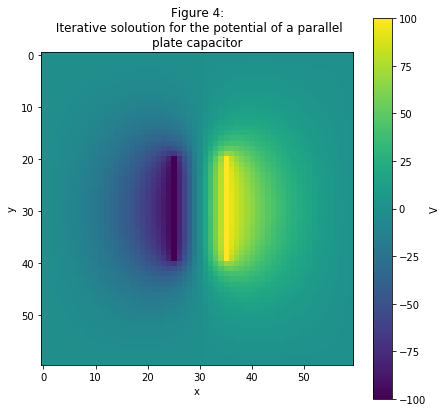

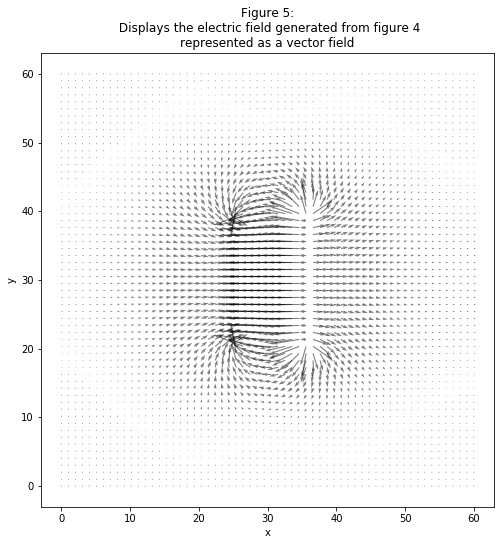

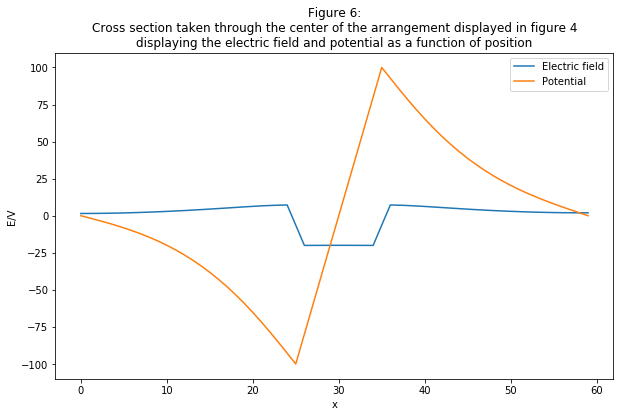

In [10]:
n=60   #Sets the order of the grid
d = 10  #Sets the plate spacing
p = (n//2)-(d//2)   #Defines a variable used for the location of the plates
v=100  #Sets the value of the potential

M =np.zeros(shape=(n,n)) 
M[20:40,p]=-v   #Sets the value and locations of the plates
M[20:40,-p]=v

cond = 1000

while (cond>0.01):
    Mc_0 = M[n-p+1][n-p+1]
    for x in np.arange(1,n-1,1):
        for y in np.arange(1,n-1,1):
            M[x][y] = Jacobi(x,y,M)
            M[20:40,25]=-v
            M[20:40,-25]=v
            Mc_1 = M[n-p+1][n-p+1]
            cond = (Mc_1 - Mc_0)
            
plt.figure(figsize=(7,7))
plt.imshow(M)
plt.title('Figure 4:\n Iterative soloution for the potential of a parallel\n\
plate capacitor')
clb = plt.colorbar()
clb.set_label('V')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


G = np.gradient(M)  #Produces the gradient from the scalar potential field
Fx,Fy = G
nrows, ncols = Fx.shape
x = np.linspace(0, n, ncols)
y = np.linspace(0, n, nrows)
xi, yi = np.meshgrid(x, y, indexing='ij')

plt.figure(figsize=(7,7))
plt.axes([0.065, 0.065, 0.9, 0.9])
plt.quiver(yi, xi, -Fy, -Fx, alpha=.5)
plt.title('Figure 5:\n Displays the electric field generated from figure 4\n\
represented as a vector field')
plt.ylabel('y')
plt.xlabel('x')
plt.show()


g = -np.gradient(M[30,:])

plt.figure(figsize=(10,6))
E_, = plt.plot(g,label="Electric field")
V_, = plt.plot(M[30,:],label="Potential")
plt.title('Figure 6:\nCross section taken through the center of the arrangement displayed in figure 4\n\
displaying the electric field and potential as a function of position')
plt.ylabel('E/V')
plt.xlabel('x')
plt.legend(handles=[E_,V_])
plt.show()



Figure 4 displays the potential of the arrangement in two dimensions and demonstrates the values trending towards zero at locations far from the plates.

Figure 5 is generated using a combination of the np.gradient and plt.quiver routines. Where np.gradient is used to generate a gradient from a scalar field and plt.quiver plots the gradient as a vector field. This perfectly represents the electric field which is the negative of the potential gradient. We see in this figure parallel lines of constant magnitude within the plates and near zero vector values far from the plates.

Figure 6 takes a cross section through the centre of the plates, running parallel to the x-axis. Its shows the magnitude of the potential and electric fields both trending to zero far from the plates and the electric field at a constant value within the plates. This agrees with the large ratio soloution of $E = v/d$ which equals a constant within the plates and zero far from the plates.